### Ray transfer matrix and paraxial approximation

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
import numpy as np

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.html

In [2]:
def free_space_propagation(ax, title=None, title_loc='center', fontsize=12):
    # Optical axis
    ax.plot([-1, 1], [0, 0], 'w', linewidth=2)
    ax.text(0.7, 0.07, 'optical axis', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # Heights y1 and y2
    y1 = 0.2
    y2 = 0.5

    # Distances
    d = 0.7

    # y1y2
    ax.plot([-d, -d], [0, y1], 'c', linewidth=2)
    ax.plot([0, 0], [0, y2], 'lime', linewidth=2)

    # Arrows for y1y2
    ax.arrow(-d, y1-0.1, 0, 0,  head_width=0.07, head_length=0.1, fc='c', ec='none')
    ax.arrow(0, y2-0.1, 0, 0,  head_width=0.07, head_length=0.1, fc='lime', ec='none')

    # Angles
    theta_1 = np.arctan2((y2-y1), d)
    theta_2 = theta_1

    # Rays
    ax.plot([-d, 0], [y1, y2], 'r', linewidth=2)
    ax.plot([0, d], [y2, y2+d*np.tan(theta_1)], 'r', linewidth=2)
    ax.arrow(-d/2, (y2+y1)/2, 0.001*np.cos(theta_1), 0.001*np.sin(theta_1),  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)
    ax.arrow(d/2, (y2+y1)/2-y1+y2, 0.001*np.cos(theta_2), 0.001*np.sin(theta_2),  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # Dashed lines
    ax.plot([-d, 0], [y1, y1], 'w--', linewidth=1)
    ax.plot([0, d], [y2, y2], 'w--', linewidth=1)

    # Angle arcs
    arc_theta_1 = Arc([-d, y1], 0.4, 0.4, theta1=0, theta2=np.rad2deg(theta_1), color='w')
    arc_theta_2 = Arc([0, y2], 0.4, 0.4, theta1=0, theta2=np.rad2deg(theta_2), color='w')
    ax.add_patch(arc_theta_1)
    ax.add_patch(arc_theta_2)

    # y1y2 Labels
    ax.text(-d-0.1, 0.1, r'$y_1$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='c')
    ax.text(0.1, 0.1, r'$y_2$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='lime')

    # theta Labels
    ax.text(-d+0.3*np.cos(theta_1/2), y1+0.3*np.sin(theta_1/2), r'$\theta_1$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.text(+0.3*np.cos(theta_1/2), y2+0.3*np.sin(theta_1/2), r'$\theta_2$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # y1y2 distance
    ax.plot([-d, -d], [0, -0.1], 'w-', linewidth=1)
    ax.plot([0, 0], [0, -0.1], 'w-', linewidth=1)
    ax.plot([-d, 0], [-0.05, -0.05], 'w-', linewidth=1)
    ax.text(-d/2, -0.15, r'$d$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.arrow(-d+0.06, -0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(-0.06, -0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    # Set limits and aspect ratio
    ax.set_xlim(-1, 1)
    ax.set_ylim(-0.2, 0.9)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

def single_lens_propagation(ax, title=None, title_loc='center', fontsize=12):
    # Optical axis
    ax.plot([-1, 1], [0, 0], 'w', linewidth=2)

    # Heights y1 and y2
    y1 = 0.4
    y2 = 0.4

    # Distances
    d = 0.05
    f = 0.4

    # y1y2
    ax.plot([-d/2, -d/2], [0, y1], 'c', linewidth=2)
    ax.plot([d/2, d/2], [0, y2], 'lime', linewidth=2)

    # Arrows for y1y2
    ax.arrow(-d/2, y1-0.1, 0, 0,  head_width=0.07, head_length=0.1, fc='c', ec='none')
    ax.arrow(d/2, y2-0.1, 0, 0,  head_width=0.07, head_length=0.1, fc='lime', ec='none')

    # Angles
    theta_1 = 0
    theta_2 = np.arctan2(y1, f-d/2)

    # Rays
    ax.plot([-2*f, -d/2], [y1, y1], 'r', linewidth=2)
    ax.plot([d/2, 2*f], [y2, y2-(2*f-d/2)*np.tan(theta_2)], 'r', linewidth=2)
    ax.arrow(-f, y1, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)
    ax.arrow(d/2+f/2, y2-f/2*np.tan(theta_2), 0.001*np.cos(theta_2), -0.001*np.sin(theta_2),  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # Dashed lines
    ax.plot([d/2, f], [y2, y2], 'w--', linewidth=1)

    # Angle arcs
    arc_theta2 = Arc([d/2, y2], 0.4, 0.4, theta1=-np.rad2deg(theta_2), theta2=0, color='w')
    ax.add_patch(arc_theta2)

    # y1y2 Labels
    ax.text(-d/2-0.1, 0.1, r'$y_1$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='c')
    ax.text(d/2+0.1, 0.1, r'$y_2$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='lime')

    # theta Labels
    ax.text(d/2+0.3*np.cos(theta_2/2), y2-0.3*np.sin(theta_2/2), r'$\theta_2$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')

    # f distance
    ax.plot([0, f], [-0.05, -0.05], 'w-', linewidth=1)
    ax.plot([0, 0], [0, -0.1], 'w-', linewidth=1)
    ax.plot([f, f], [0, -0.1], 'w-', linewidth=1)
    ax.text(f/2, -0.15, r'$f$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.arrow(0.06, -0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(f-0.06, -0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    # Lens
    lens = Ellipse((0,0), d, 1.2, edgecolor='none', facecolor='skyblue', zorder=-2)
    ax.text(-0.3, -0.3, 'thin lens', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.add_patch(lens)

    # Set limits and aspect ratio
    ax.set_xlim(-1, 1)
    ax.set_ylim(-0.4, 0.7)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

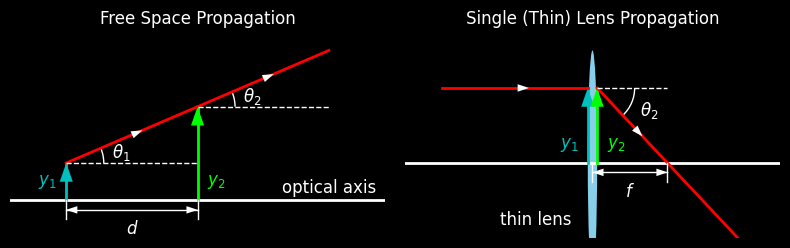

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

free_space_propagation(axes[0], 'Free Space Propagation')
single_lens_propagation(axes[1], 'Single (Thin) Lens Propagation')

plt.tight_layout()
plt.show()

Define state at each location along optical axis

$$\left[ \begin{array}{c} \theta \\ y \end{array} \right]$$

In `free space`

$$y_2=y_1+d\tan(\theta_1)\approx y_1+d\theta_1$$

$$\theta_1=\theta_2$$

where $\tan(\theta_1) \approx \theta_1$ (same for $\sin(\theta_1) \approx \theta_1$), when $\theta_1$ is small (known as `paraxial approximation`), the two equations can be written as

$$\left[ \begin{array}{c} \theta_2 \\ y_2 \end{array} \right] =
\left[ \begin{array}{cc} 1 & 0 \\ d & 1 \end{array} \right]
\left[ \begin{array}{c} \theta_1 \\ y_1 \end{array} \right]$$ \

For free space, the `transfer matrix` is

$$\boxed{\left[ \begin{array}{cc} 1 & 0 \\ d & 1 \end{array} \right]} $$

For `thin lens`

$$\left[ \begin{array}{c} \theta_2 \\ y_2 \end{array} \right] =
\left[ \begin{array}{cc} A & B \\ C & D \end{array} \right]
\left[ \begin{array}{c} \theta_1 \\ y_1 \end{array} \right]$$ \

we have

$$y_1=y_2$$

so, $$C=0, D=1$$

and $$\theta_2 = - \tan^{-1}(\frac{y_1}{f}) \approx -\frac{y_1}{f},\, \theta_1=0$$

so, $$B=-\frac{1}{f}$$

Finally, for a ray through center

$$ y_2 = y_1 =0, \theta_1=\theta_2 $$

we get, $$A=1$$

Therefore, for thin lens, the `transfer matrix` is

$$\boxed{\left[ \begin{array}{cc} A & B \\ C & D \end{array} \right] =
\left[ \begin{array}{cc} 1 & -\frac{1}{f} \\ 0 & 1 \end{array} \right]} $$


### Single lens system

In [4]:
def convex_lens_imaging_real(ax, title=None, title_loc='center', fontsize=12, annotation=True):
    # Optical axis
    ax.plot([-1.2, 1.2], [0, 0], 'w', linewidth=2)

    # Distances
    d = 0.05
    f = 0.4

    # y1 and arrows
    y1 = 0.4
    ax.plot([-2.5*f, -2.5*f], [0, y1], 'c', linewidth=2)
    ax.arrow(-2.5*f, y1-0.1, 0, 0,  head_width=0.07, head_length=0.1, fc='c', ec='none')

    # Angles
    theta_1 = 0
    theta_2 = np.arctan2(y1, f-d/2)

    # Ray 1
    ax.plot([-2.5*f, -d/2], [y1, y1], 'r', linewidth=2)
    ax.plot([d/2, 2.5*f], [y1, y1-(2.5*f-d/2)*np.tan(theta_2)], 'r', linewidth=2)
    ax.arrow(-f, y1, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)
    ax.arrow(d/2+f/2, y1-f/2*np.tan(theta_2), 0.001*np.cos(theta_2), -0.001*np.sin(theta_2),  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # Ray1 2
    ax.plot([-2.5*f, 2.5*f], [y1, -y1], 'r', linewidth=2)
    ax.arrow(-f, y1/2.5, 0.0025, -0.001,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # Ray 3
    ax.plot([-2.5*f, -d/2], [y1, y1-(2.5*f-d/2)/1.5], 'r', linewidth=2)
    ax.plot([d/2, 2.5*f], [y1-(2.5*f-d/2)/1.5, y1-(2.5*f-d/2)/1.5], 'r', linewidth=2)
    ax.arrow(0.5*f, y1-(2.5*f-d/2)/1.5, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none', zorder=5)

    # y2 and arrows
    y2 = 0.4
    ax.plot([(f-d/2)/y1*(2.5*f-d/2)/1.5+d/2, (f-d/2)/y1*(2.5*f-d/2)/1.5+d/2], [0, y1-(2.5*f-d/2)/1.5], 'lime', linewidth=2, zorder=5)
    ax.arrow((f-d/2)/y1*(2.5*f-d/2)/1.5+d/2+0.005, y1-(2.5*f-d/2)/1.5+0.08, 0, -0.001,  head_width=0.07, head_length=0.1, fc='lime', ec='none')

    # f distance
    ax.plot([0, 0], [0, -0.1], 'w-', linewidth=1)
    ax.plot([0, f], [-0.05, -0.05], 'w-', linewidth=1)
    ax.plot([f, f], [0, -0.1], 'w-', linewidth=1)
    ax.plot([0, -f], [-0.05, -0.05], 'w-', linewidth=1)
    ax.plot([-f, -f], [0, -0.1], 'w-', linewidth=1)
    ax.text(f/2, -0.15, r'$f$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.text(-f/2, -0.15, r'$f$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
    ax.arrow(0.06, -0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(f-0.06, -0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(-0.06, -0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
    ax.arrow(-f+0.06, -0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    if annotation:
        # s distance
        ax.plot([0, 0], [y1-(2.5*f-d/2)/1.5, y1-(2.5*f-d/2)/1.5-0.1], 'w-', linewidth=1)
        ax.plot([0, (f-d/2)/y1*(2.5*f-d/2)/1.5+d/2], [y1-(2.5*f-d/2)/1.5-0.05, y1-(2.5*f-d/2)/1.5-0.05], 'w-', linewidth=1)
        ax.plot([(f-d/2)/y1*(2.5*f-d/2)/1.5+d/2, (f-d/2)/y1*(2.5*f-d/2)/1.5+d/2], [y1-(2.5*f-d/2)/1.5, y1-(2.5*f-d/2)/1.5-0.1], 'w-', linewidth=1)
        ax.plot([0, -2.5*f], [y1-(2.5*f-d/2)/1.5-0.05, y1-(2.5*f-d/2)/1.5-0.05], 'w-', linewidth=1)
        ax.plot([-2.5*f, -2.5*f], [y1-(2.5*f-d/2)/1.5, y1-(2.5*f-d/2)/1.5-0.1], 'w-', linewidth=1)
        ax.text(((f-d/2)/y1*(2.5*f-d/2)/1.5+d/2)/2, y1-(2.5*f-d/2)/1.5-0.15, r'$s_i$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
        ax.text(-2.5*f/2, y1-(2.5*f-d/2)/1.5-0.15, r'$s_o$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize, color='w')
        ax.arrow(0.06, y1-(2.5*f-d/2)/1.5-0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
        ax.arrow((f-d/2)/y1*(2.5*f-d/2)/1.5+d/2-0.06, y1-(2.5*f-d/2)/1.5-0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
        ax.arrow(-0.06, y1-(2.5*f-d/2)/1.5-0.05, 0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')
        ax.arrow(-2.5*f+0.06, y1-(2.5*f-d/2)/1.5-0.05, -0.001, 0,  head_width=0.04, head_length=0.06, fc='w', ec='none')

    # Lens
    lens = Ellipse((0,0), d, 1.2, edgecolor='none', facecolor='skyblue', zorder=-5)
    ax.add_patch(lens)

    # Set limits and aspect ratio
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.7, 0.7)
    ax.set_aspect('equal')
    # ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

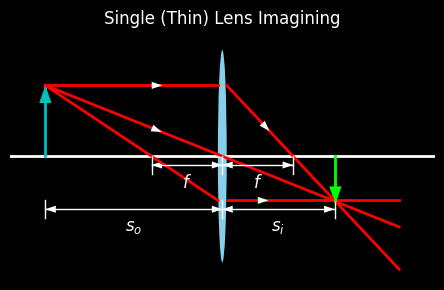

In [5]:
fig_1, ax_1 = plt.subplots(figsize=(6, 3))

convex_lens_imaging_real(ax_1, 'Single (Thin) Lens Imagining')

plt.tight_layout()
plt.show()

For a single lens system, the complete `transfer matrix` is (We will verify using SymPy next)

$$\left[ \begin{array}{c} \theta_2 \\ y_2 \end{array} \right] =
\left[ \begin{array}{cc} 1 & 0 \\ s_i & 1 \end{array} \right]
\left[ \begin{array}{cc} 1 & -\frac{1}{f} \\ 0 & 1 \end{array} \right]
\left[ \begin{array}{cc} 1 & 0 \\ s_o & 1 \end{array} \right]\left[ \begin{array}{c} \theta_1 \\ y_1 \end{array} \right] =
\left[ \begin{array}{cc} 1-\frac{s_o}{f} & -\frac{1}{f} \\ s_i\left(1-\frac{s_o}{f} \right)+s_o & 1-\frac{s_i}{f} \end{array} \right] \left[ \begin{array}{c} \theta_1 \\ y_1 \end{array} \right]
$$

The `imaging condition` is that $y_2$ is independent of $\theta_1$, so

$$s_i\left(1-\frac{s_o}{f} \right)+s_o=0 \Rightarrow \boxed{\frac{1}{s_0} + \frac{1}{s_i} = \frac{1}{f}}$$

The (linear) `magnification factor` is

$$D=\frac{y_2}{y_1}=1-\frac{s_i}{f}=\boxed{-\frac{s_i}{s_o}}$$


In [6]:
import sympy as smp
import numpy as np
np.random.seed(42)
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

In [7]:
# set up variables as symbols
s_o, s_i, f = smp.symbols('s_o, s_i, f')

In [8]:
# set up matrices for free space and thin lens
mat_1 = smp.Matrix([[1, 0], [s_i, 1]])
mat_2 = smp.Matrix([[1, -1/f], [0, 1]])
mat_3 = smp.Matrix([[1, 0], [s_o, 1]])

In [9]:
# compute transfer matrix of single lens system
trans_mat = mat_1*mat_2*mat_3
trans_mat

Matrix([
[            1 - s_o/f,      -1/f],
[s_i + s_o*(1 - s_i/f), 1 - s_i/f]])